# Volcanoes and Their Effects on Global Temperatures

$\textbf{Johnathan C. Kuttai}$

Department of Earth, Ocean and Atmospheric Sciences

University of British Columbia University

Vancouver, BC 15213

11074580

$\texttt{jkutt@eoas.ubc.ca}$

## Abstract

Natural sources capable of affecting global temperature are a few but their affects are far reaching and potentially
catostrophic. Volcanoes are an example of a source capable of such a feat. They are explosive and destructive and vary in 
impact strength. The impact depends greatly on where the material from the blast is injected into the atmosphere. Material 
injected intp the top layers, for example the stratosphere, remain longer than in the lower layers. Material in the top 
layers can remain for years while the lower layers the material can be cyled out in months (**reference**). To reach the 
stratosphere are the extreme events tend to occur on long time scales of hundreds of years at minimum. The two common 
volcanic events are the single explosive event and the less impactful cluster volcanoes.




## Introduction

Volcanic events can range from mild to extreme events which can directly impact climate. This is done by injecting mostly sulphur dioxide into the stratosphere which is oxidised into sulphate aerosols [1]. Not only are the sulphates a problem but volcanoes can emit CO2 and other harmful aerosols. CO2 is formally known to increase global temperatures while aerosols produce periods of cooling [3]. The cooling is due the scattering of incoming radiation at various amounts given the aerosol makeup [2]. Different elements will scatter more efficiently than others. 

Given that Aerosols will have a relatively short lifetime (roughly one year [1]), different types of volcanic events will have varied effects on long term climate. Generally two types of volcanic events can occur; single explosive and cluster events (VolMIP). Since the intensity of volcanic events can vary, the aerosols can be injected at different heights in the atmosphere. 

Provided all this variability, the radiative forcings could be greatly different from case to case. For example single events will have great immediate effect where cluster events could frequently replenish the aerosols and CO2 creating a contrast of constant cooling due to aerosols and warming due to CO2.

In recent history very few large magnitude events have occured. 
- Mount Pinatubo (Philippines, 1991) 
- Mount Hudson (Chile, 1991)
- Mount St. Helens (United States, 1980)
- Mount Tambora (Indonesia, 1815)
- Laki (Iceland, 1783)
- Krakatoa (Indonesia, 1883)

Each caused significant effects on the global climate. Since Volcanoes emit both $CO_2$ and $SO_4$, volcanoes have a unique opprotunity to heat and to cool the planet. The heating comes from additional $CO_2$ in the atmosphere creating a greenhouse effect. This is counteracted by cooling caused by the addtional $SO_4$ in the atmosphere. This study builds a model using the **climlab** opensource to explore this process and the effects it can have on a warming climate like we are currently experiencing. The impact of each type of volcanic event; the explosive and cluster events will also be accessed on the climate sensitivity of both. The thought is that given the most common chemical makeup in a volcanic event is $SO_4$ which cools global surface temperatures, that it can be combatitive to the amount of $CO_2$ introduced yearly antropogenically.  

Many of the above events are dated before technological measurements. The sample pool of these events is therefore limited. Though, Mount Pinatobu data and models are readily available through VolMIP (**reference volmip**). This study will focus on the VolMIP Canadian model CMIP6 CanESM5. Using this model we can compare and validate the model's results.

## Aerosols

The main connectivity that volcanoes have to climate is via aerosols. The most common chemical make up of aerosols are the following:

- Sulphates
- Carbon dioxide
- Chlorides
- Silicates
- Trace elements

Sulphates are typically the most abundant and in the form of SO4 it readily reacts with Ozone ($O_3$) and depletes it. Since $O_3$ is concentrated in the Stratosphere, the effects here are greater. Chlorides can also have significant effects as it can readily react with atmosphere generally creating hydrochloric acid (HCl).


## Mount Pinatobu reference data

The data was accessed via the **get proper url** and stored as netCDF files readily opened by xarray (**reference**). The following code loads the CanESM5 model allowing us to analyze the data for the observed Mount Pinatobu eruption. The main data of concern to this project are the aerosols and temperatures. The radiation balance is also observed as it relates to the source of heat for the planet. Figure 1 presents the model parameters of interest. A noteable feature is the warmer temperature in the northern hemisphere coinciding with highest concentration of aerosols.


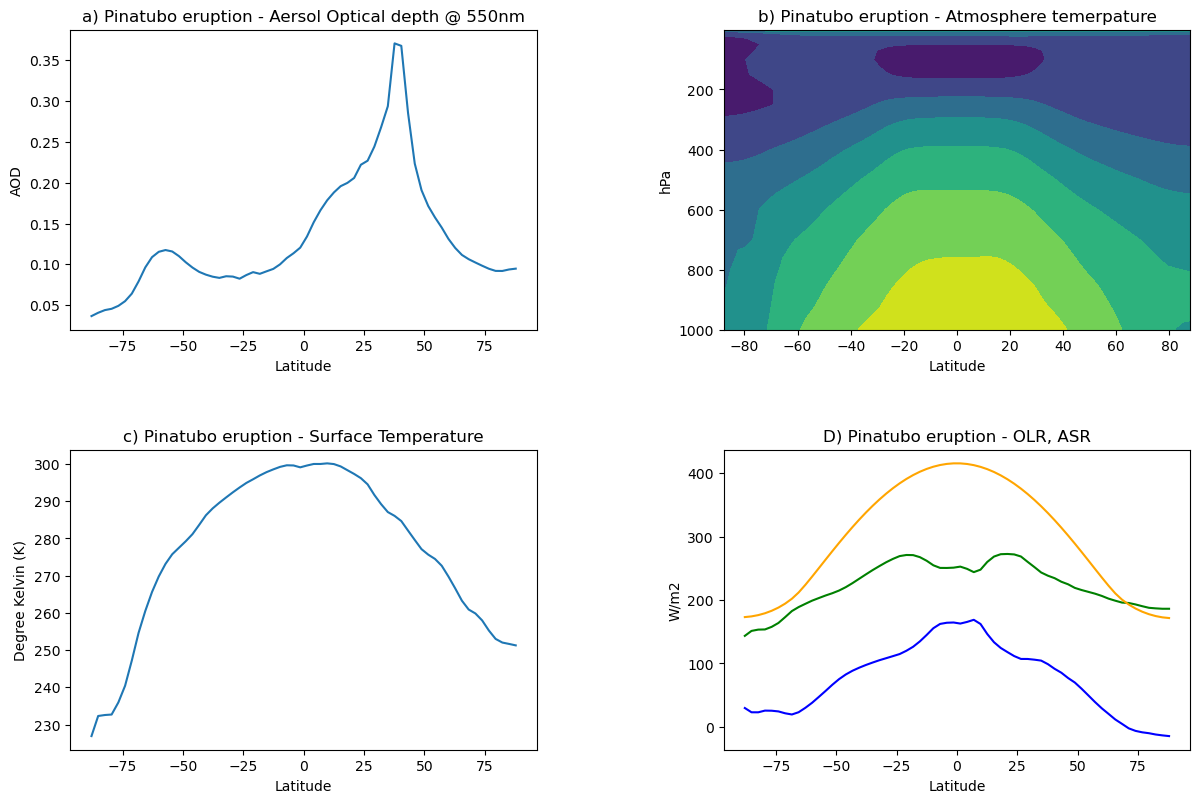

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import climlab
from climlab import constants as const

# load the atmospheric temperature data of the CanESM5 Pinatobu model
ds_disk = xr.open_dataset(r"C:\Users\johnk\Documents\git\jresearch\courses\climate\ta_Amon_CanESM5_volc-pinatubo-full_r9i1p2f1_gn_199106-199605.nc")

# load the aerosol data of the CanESM5 Pinatobu model
aero = xr.open_dataset(r"C:\Users\johnk\repos\assignments\od550csaer_AERmon_CanESM5_dcppC-forecast-addPinatubo_s2014-r9i1p2f1_gn_201501-202412.nc")

# load surface temperature data
t_surface = xr.open_dataset(r"C:\Users\johnk\repos\assignments\ts_Amon_CanESM5_volc-pinatubo-full_r9i1p2f1_gn_199106-199605.nc")

# load Outgoing long wave radiation and incoming solar radiation
olr = xr.open_dataset(r"C:\Users\johnk\repos\assignments\rlut_Amon_CanESM5_volc-pinatubo-full_r9i1p2f1_gn_199106-199605.nc")
asr = xr.open_dataset(r"C:\Users\johnk\repos\assignments\rsdt_Amon_CanESM5_volc-pinatubo-full_r9i1p2f1_gn_199106-199605.nc")

# create data variables
coslat = np.cos(np.deg2rad(ds_disk.lat))
weight_factor = 1 # coslat / coslat.mean(dim='lat') 

aerosol_data = aero.od550csaer.mean(dim=('time', 'lon'))

temperature_field = (ds_disk.ta * weight_factor).mean(dim=('time', 'lon'))

surface_temp = t_surface.ts.mean(dim=('time', 'lon'))

olr_data = olr.rlut.mean(dim=('time', 'lon'))
asr_data = asr.rsdt.mean(dim=('time', 'lon'))

# plot the data
plot_pinatobu(aerosol_data, temperature_field, surface_temp, olr_data, asr_data)



**Figure 1**: CanESM5 Mount Pinatobu model data. a) Aerosol optical depth with latitude. b)The temperature of the atmosphere with latitude. c) Surface temperature with latitude. d) OLR and ASR and the net balance with latitude.


# Advanced EBM Model

A 2D Energy Balance Model (EBM) based of Lab 29:

2D column data
- 60 layer atmosphere
- 50 cell latitude

The model consists of the processes:
- Radiation
- Insolation
- Water Vapor
- Convection
- Diffusion
- Sensible heat flux
- Latent heat flux

From this base model, aerosol were added to the radiation process via the available parameters `tauaer_sw`, `ssaaer_sw`. These represent the aersol optical depth and aersol scattering albedo respectively. 

## Create the 2D domain and top level model

In [8]:
# A two-dimensional domain
num_lev = 50
state = climlab.column_state(num_lev=num_lev, num_lat=60, water_depth=10.)
lev = state.Tatm.domain.axes['lev'].points
print(lev.shape)

#  The top-level model
model_base = climlab.TimeDependentProcess(state=state, name='Radiative-Convective-Diffusive Model')

(50,)


## Clouds

To make the simulation closer to reality, the model incorporates clouds at a few levels of the atmosphere.

In [9]:
#  Define two types of cloud, high and low
cldfrac = np.zeros_like(state.Tatm)
r_liq = np.zeros_like(state.Tatm)
r_ice = np.zeros_like(state.Tatm)
clwp = np.zeros_like(state.Tatm)
ciwp = np.zeros_like(state.Tatm)

#   indices
high = 10  # corresponds to 210 hPa
low = 40   #  corresponds to 810 hPa

#  A high, thin ice layer (cirrus cloud)
r_ice[:,high] = 14. # Cloud ice crystal effective radius (microns)
ciwp[:,high] = 10.  # in-cloud ice water path (g/m2)
cldfrac[:,high] = 0.322

#  A low, thick, water cloud layer (stratus)
r_liq[:,low] = 14.  # Cloud water drop effective radius (microns)
clwp[:,low] = 100.  # in-cloud liquid water path (g/m2)
cldfrac[:,low] = 0.21

# wrap everything up in a dictionary
cloud_parameter = {'cldfrac': cldfrac,
                   'ciwp': ciwp,
                   'clwp': clwp,
                   'r_ice': r_ice,
                   'r_liq': r_liq}

#### Plot clouds in the column

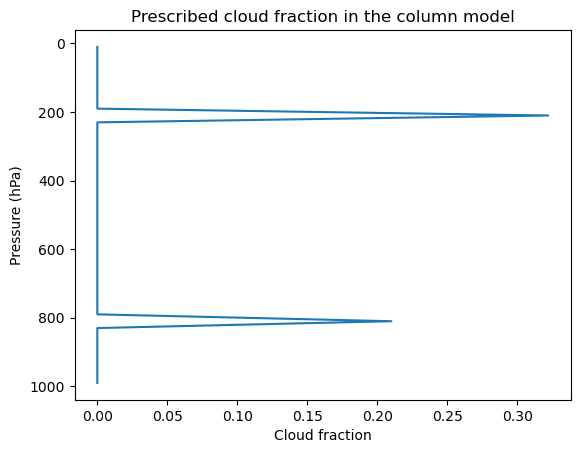

In [10]:
plt.plot(cldfrac[0,:], lev)
plt.gca().invert_yaxis()
plt.ylabel('Pressure (hPa)')
plt.xlabel('Cloud fraction')
plt.title('Prescribed cloud fraction in the column model')
plt.show()

## Aerosols

To simulate the effects of volcanoes and the impact we use the aersols to simulate an eruption event

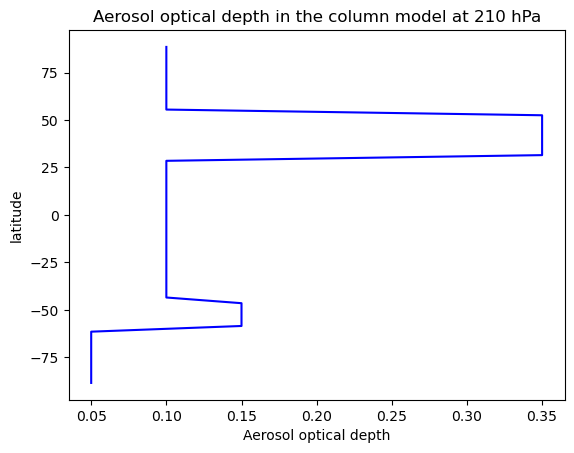

In [11]:
#  Define two types of aerosol injections, high and low
aerosol_optical_depth = np.zeros_like(state.Tatm)

#   indices
high = 10  # corresponds to 210 hPa
low = 40   #  corresponds to 810 hPa

# now lets take the observed data from the Pinatobu eruption
# aero_input = aero_dat.interp(lat=model_base.lat)

#  A high, aerosol injection
aerosol_optical_depth[:,high] = 0.1
aerosol_optical_depth[:,high + 1] = 0.1
aerosol_optical_depth[40:48,high] = 0.35
aerosol_optical_depth[40:48,high + 1] = 0.35
aerosol_optical_depth[10:15,high] = 0.15
aerosol_optical_depth[10:15,high + 1] = 0.15
aerosol_optical_depth[:10,high] = 0.05
aerosol_optical_depth[:10,high + 1] = 0.05

#  A low, aerosol injection height
# aerosol_optical_depth[:,low] = 0.35
# aerosol_optical_depth[:,low + 1] = 0.35

aerosol_scatter_albedo = np.zeros_like(state.Tatm)

aerosol_scatter_albedo[:,high] = 0.1
aerosol_scatter_albedo[:,high + 1] = 0.1
# aerosol_scatter_albedo[:,low] = 0.1
# aerosol_scatter_albedo[:,low + 1] = 0.1

plt.plot(aerosol_optical_depth[:,high], model_base.lat, 'b')
# plt.plot(aerosol_optical_depth[20,:], lev, 'g')
# plt.plot(aerosol_optical_depth[50,:], lev, 'r')
# plt.gca().invert_yaxis()
plt.ylabel('latitude')
plt.xlabel('Aerosol optical depth')
plt.title('Aerosol optical depth in the column model at 210 hPa')
plt.show()

# print(aerosol_optical_depth.shape, aero_input.shape)

## Build the model

Build the base model for the starting climate

In [12]:

#  Specified relative humidity distribution
h2o = climlab.radiation.ManabeWaterVapor(state=state)
#  Hard convective adjustment for ATMOSPHERE ONLY (not surface)
conv = climlab.convection.ConvectiveAdjustment(state={'Tatm':model_base.state['Tatm']},
                                               adj_lapse_rate=6.5,
                                               **model_base.param)
#  Annual mean insolation as a function of latitude and time of year
sun = climlab.radiation.DailyInsolation(domains=model_base.Ts.domain)

rad = climlab.radiation.RRTMG(name='Radiation',
                              state=state, 
                              specific_humidity=h2o.q,
                              timestep = climlab.constants.seconds_per_day,
                              albedo = 0.125,
                              insolation=sun.insolation,
                              coszen=sun.coszen,
                              tauaer_sw=aerosol_optical_depth,
                              ssaaer_sw=aerosol_scatter_albedo,
#                               ecaer_sw=aerosol_optical_depth,
                              **cloud_parameter
                             )
rad.subprocess['SW'].iaer=0,

model_base.add_subprocess('Radiation + Aerosol', rad)
model_base.add_subprocess('Insolation', sun)
model_base.add_subprocess('WaterVapor', h2o)
model_base.add_subprocess('Convection', conv)

from climlab.dynamics import MeridionalDiffusion

# thermal diffusivity in W/m**2/degC
D = 0.04
# meridional diffusivity in m**2/s
K = D / model_base.Tatm.domain.heat_capacity[0] * const.a**2
d = MeridionalDiffusion(state={'Tatm': model_base.state['Tatm']}, 
                        K=K, **model_base.param)
model_base.add_subprocess('Diffusion', d)

#  Add surface heat fluxes
shf = climlab.surface.SensibleHeatFlux(state=model_base.state, Cd=0.5E-3)
lhf = climlab.surface.LatentHeatFlux(state=model_base.state, Cd=0.5E-3)
# set the water vapor input field for LHF
lhf.q = h2o.q
model_base.add_subprocess('SHF', shf)
model_base.add_subprocess('LHF', lhf)


C:\Users\johnk\AppData\Local\miniconda3\envs\climphys\lib\site-packages\climlab\radiation\radiation.py:156: UserWarning: Some grid points are beyond the bounds of the ozone file. Ozone values will be extrapolated.
  warnings.warn('Some grid points are beyond the bounds of the ozone file. Ozone values will be extrapolated.')


In [13]:
model_base.integrate_years(3.)

#  One more year to get annual-mean diagnostics
model_base.integrate_years(1.)

Integrating for 1095 steps, 1095.7266 days, or 3.0 years.
Total elapsed time is 2.998010635134713 years.
Integrating for 365 steps, 365.2422 days, or 1.0 years.
Total elapsed time is 3.997347513512951 years.




 equilibrium:           [158.59026309]


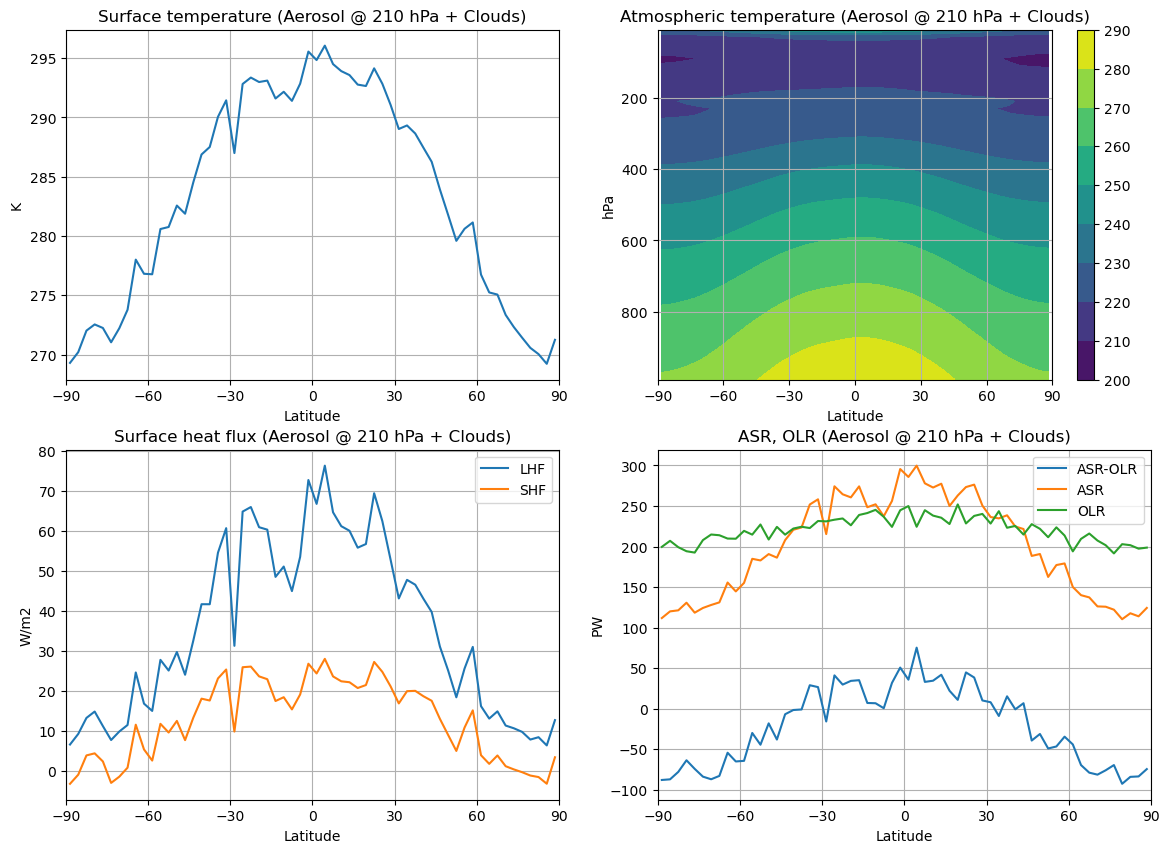

In [14]:
plot_results(model_base)

## Volcano eruption

Hit the model with an eruption of SO4 injected to stratoshpere (810 kPa)

Integrating for 365 steps, 365.2422 days, or 1.0 years.
Total elapsed time is 4.996684391891189 years.


 equilibrium:           [141.56532107]


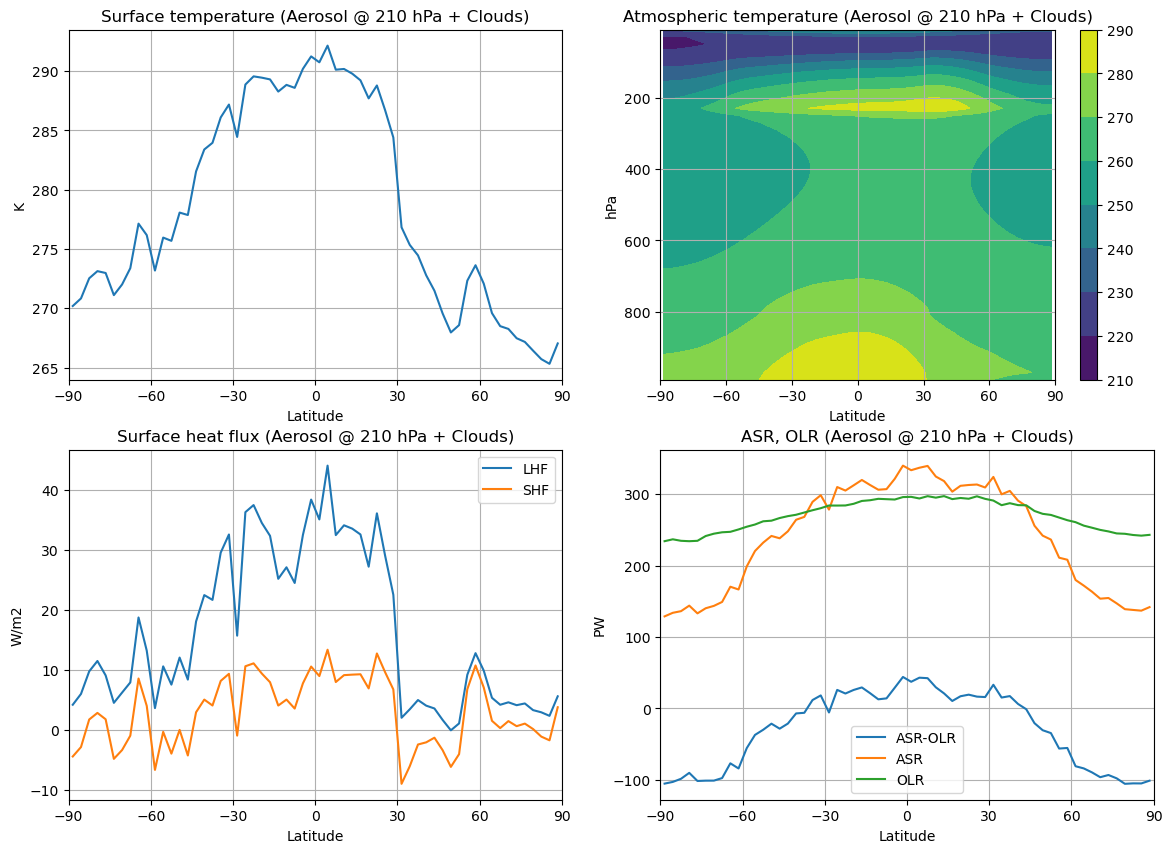

In [15]:
model_volcano = climlab.process_like(model_base)

model_volcano.subprocess['Radiation + Aerosol'].subprocess['SW'].iaer=10
model_volcano.subprocess['Radiation + Aerosol'].tauaer_sw = aerosol_optical_depth
model_volcano.subprocess['Radiation + Aerosol'].subprocess['SW'].ssaaer_sw=aerosol_scatter_albedo
model_volcano.integrate_years(1.)
    
plot_results(model_volcano)

plt.show()

# # decrease and proceed
# aerosol_optical_depth[:,low] = 0.26
# aerosol_optical_depth[:,low + 1] = 0.26
# model_volcano.subprocess['Radiation + Aerosol'].tauaer_sw = aerosol_optical_depth

# model_volcano.integrate_years(1.)

# # decrease and proceed
# aerosol_optical_depth[:,low] = 0.22
# aerosol_optical_depth[:,low + 1] = 0.22
# model_volcano.subprocess['Radiation + Aerosol'].tauaer_sw = aerosol_optical_depth

# model_volcano.integrate_years(1.)

# plot_results(model_volcano)

# plt.show()

## Remove Aerosols

Remove aerosols and run to equilibrium

In [ ]:
model_remove = climlab.process_like(model_volcano)
model_remove.subprocess['Radiation + Aerosol'].subprocess['SW'].iaer=0
model_remove.subprocess['Radiation + Aerosol'].tauaer_sw = np.zeros_like(aerosol_optical_depth)
model_remove.integrate_years(4.)
    
plot_results(model_remove)

# References:

- Paik, Seungmok, and Seung-Ki Min. ‘Assessing the Impact of Volcanic Eruptions on Climate Extremes Using CMIP5 Models’. Journal of Climate 31, no. 14 (15 July 2018): 5333–49. https://doi.org/10.1175/JCLI-D-17-0651.1.


- Alston, Erica, and Irina Sokolik. ‘Assessment of Aerosol Radiative Forcing with 1-D Radiative Transfer Modeling in the U. S. South-East’. Atmosphere 9, no. 7 (17 July 2018): 271. https://doi.org/10.3390/atmos9070271.


- Anchukaitis, Kevin J., Petra Breitenmoser, Keith R. Briffa, Agata Buchwal, Ulf Büntgen, Edward R. Cook, Rosanne D. - - - 

- D’Arrigo, et al. ‘Tree Rings and Volcanic Cooling’. Nature Geoscience 5, no. 12 (December 2012): 836–37. https://doi.org/10.1038/ngeo1645.


- Dhomse, S. S., K. M. Emmerson, G. W. Mann, N. Bellouin, K. S. Carslaw, M. P. Chipperfield, R. Hommel, et al. ‘Aerosol Microphysics Simulations of the Mt.~Pinatubo Eruption with the UM-UKCA Composition-Climate Model’. Atmospheric Chemistry and Physics 14, no. 20 (24 October 2014): 11221–46. https://doi.org/10.5194/acp-14-11221-2014.


## Apendix A - Helper functions

In [35]:
def plot_pinatobu(aero_dat, field, ts_dat, olr_dat, asr_dat):
    
    fig, axs = plt.subplots(2, 2, figsize=(14, 9))
    
    # aerosol data
    axs[0, 0].plot(aero_dat.lat, aero_dat)
    axs[0, 0].set_title('a) Pinatubo eruption - Aersol Optical depth @ 550nm', fontsize=12)
    axs[0, 0].set_xlabel('Latitude')
    axs[0, 0].set_ylabel('AOD')
    
    # atmospheric temperature 
    cax = axs[0, 1].contourf(ds_disk.ta.lat, ds_disk.ta.plev * 1e-2, field)
    axs[0, 1].set_title('b) Pinatubo eruption - Atmosphere temerpature', fontsize=12)
    axs[0, 1].set_xlabel('Latitude')
    axs[0, 1].set_ylabel('hPa')
    axs[0, 1].invert_yaxis()
    fig.colorbar(cax, ax=ax, shrink=0.5)
    
    # surface temperature
    axs[1, 0].plot(ts_dat.lat, ts_dat)
    axs[1, 0].set_title('c) Pinatubo eruption - Surface Temperature', fontsize=12)
    axs[1, 0].set_xlabel('Latitude')
    axs[1, 0].set_ylabel('Degree Kelvin (K)')
    
    # OLR ASR
    axs[1, 1].plot(olr_dat.lat, olr_dat, 'g')
    axs[1, 1].plot(asr_dat.lat, asr_dat, 'orange')
    axs[1, 1].plot(asr_dat.lat, asr_dat - olr_dat, 'b')
    axs[1, 1].set_title('D) Pinatubo eruption - OLR, ASR', fontsize=12)
    axs[1, 1].set_xlabel('Latitude')
    axs[1, 1].set_ylabel('W/m2')
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

def plot_results(model):
    
    ticks = [-90, -60, -30, 0, 30, 60, 90]
    fig, axes = plt.subplots(2,2,figsize=(14,10))
    ax = axes[0,0]
    ax.plot(model.lat, model.timeave['Ts'])
    # ax.set_title('Surface temperature (Aerosol + Clouds)')
    # ax.set_title('Surface temperature (Aerosol @ 810 hPa + Clouds)')
    ax.set_title('Surface temperature (Aerosol @ 210 hPa + Clouds)')
    # ax.set_title('Surface temperature (Aerosol + Clear sky)')
    ax.set_ylabel('K')

    ax2 = axes[0,1]
    field = (model.timeave['Tatm']).transpose()
    cax = ax2.contourf(model.lat, model.lev, field)
    ax2.invert_yaxis()
    fig.colorbar(cax, ax=ax2)
    # ax2.set_title('Atmospheric temperature (Aerosol + Clear sky)');
    # ax2.set_title('Atmospheric temperature (Aerosol + Clouds)')
    # ax2.set_title('Atmospheric temperature (Aerosol @ 810 hPa + Clouds)')
    ax2.set_title('Atmospheric temperature (Aerosol @ 210 hPa + Clouds)')
    ax2.set_ylabel('hPa')

    ax3 = axes[1,0]
    ax3.plot(model.lat, model.timeave['LHF'], label='LHF')
    ax3.plot(model.lat, model.timeave['SHF'], label='SHF')
    # ax3.set_title('Surface heat flux (Aerosol + Clouds)')
    # ax3.set_title('Surface heat flux (Aerosol + clear sky)')
    # ax3.set_title('Surface heat flux (Aerosol @ 810 hPa + Clouds)')
    ax3.set_title('Surface heat flux (Aerosol @ 210 hPa + Clouds)')

    ax3.set_ylabel('W/m2')
    ax3.legend();

    ax4 = axes[1,1]
    Rtoa = np.squeeze(model.timeave['ASR'] - model.timeave['OLR'])
    # ax4.plot(model.lat, inferred_heat_transport(Rtoa, model.lat))
    ax4.plot(model.lat, Rtoa)
    ax4.plot(model.lat, model.timeave['ASR'])
    ax4.plot(model.lat, model.timeave['OLR'])
    # ax4.plot(model.lat, inferred_heat_transport(Rtoa, model.lat))
    # ax4.set_title('ASR, OLR (Aerosol + Clear sky)')
    # ax4.set_title('ASR, OLR (Aerosol @ 810 hPa + Clouds)')
    ax4.set_title('ASR, OLR (Aerosol @ 210 hPa + Clouds)')
    ax4.legend(['ASR-OLR', 'ASR', 'OLR'])
    ax4.set_ylabel('PW')

    for ax in axes.flatten():
        ax.set_xlim(-90,90); ax.set_xticks(ticks)
        ax.set_xlabel('Latitude'); ax.grid();

    print(f"\n\n equilibrium:           {(model.ASR - model.OLR)[0]}")
    

def inferred_heat_transport( energy_in, lat_deg ):
    '''Returns the inferred heat transport (in PW) by integrating the net energy imbalance from pole to pole.'''
    from scipy import integrate
    from climlab import constants as const
    lat_rad = np.deg2rad( lat_deg )
    return ( 1E-15 * 2 * np.math.pi * const.a**2 * 
            integrate.cumtrapz( np.cos(lat_rad)*energy_in,
            x=lat_rad, initial=0. ) )


In [37]:
# Import the necessary libraries
import gmplot

# Set the coordinates of Mount Pinatubo
mount_pinatubo_lat = 15.141792
mount_pinatubo_lng = 120.348838

# Set the center coordinates and zoom level of the map
gmap = gmplot.GoogleMapPlotter(mount_pinatubo_lat, mount_pinatubo_lng, zoom=13)

# Mark the location of Mount Pinatubo on the map
gmap.marker(mount_pinatubo_lat, mount_pinatubo_lng, title='Mount Pinatubo')

# Draw the map and save it to a file
gmap.draw("mount_pinatubo_map.html")

ModuleNotFoundError: No module named 'gmplot'